<img src='logo_trybe.png'></a>

# Análise Exploratória - Case
## Open University Learning Analytics dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Informações sobre os estudantes

In [2]:
 #dataset studentInfo.csv

 studentInfo = pd.read_csv('data/studentInfo.csv', sep=',', encoding='ISO-8859-1')

In [3]:
studentInfo.sample(20).head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1577,BBB,2013B,531428,F,East Midlands Region,A Level or Equivalent,30-40%,0-35,1,120,N,Withdrawn
3964,BBB,2013J,591937,F,East Midlands Region,Lower Than A Level,20-30%,0-35,0,60,N,Withdrawn
12558,CCC,2014J,681642,M,Ireland,A Level or Equivalent,NaN,0-35,0,120,N,Pass
10456,CCC,2014B,2110039,M,London Region,Lower Than A Level,30-40%,35-55,0,90,Y,Withdrawn
25147,FFF,2013J,582842,M,South West Region,A Level or Equivalent,40-50%,0-35,0,120,Y,Withdrawn


In [4]:
studentInfo['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

____
## Analisando o gênero declarado
* Quantidades

In [5]:
studentInfo['gender'].unique()

array(['M', 'F'], dtype=object)

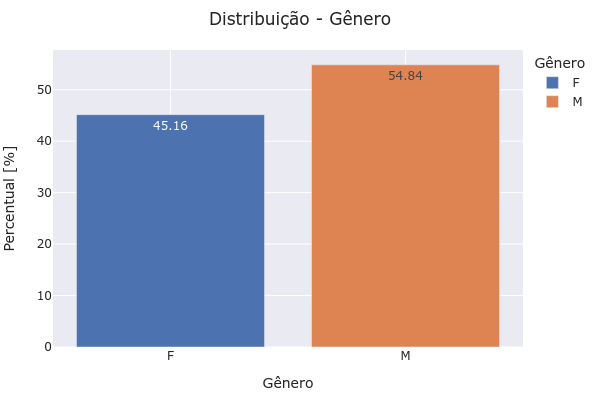

In [6]:
#plota as quantidades
genero = studentInfo.groupby('gender').agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", 'id_student': 'Qtde'})

genero['Percentual'] = genero.apply(lambda x: round(100 * (x['Qtde'] / genero['Qtde'].sum()),2), axis=1)
    
fig = px.bar(genero, x='Genero', y='Percentual', \
    text='Percentual', color='Genero',  hover_data=['Qtde'],\
        template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Gênero',
    xaxis_title="Gênero",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

### Analise para correlação entre o gẽnero e o resultado final

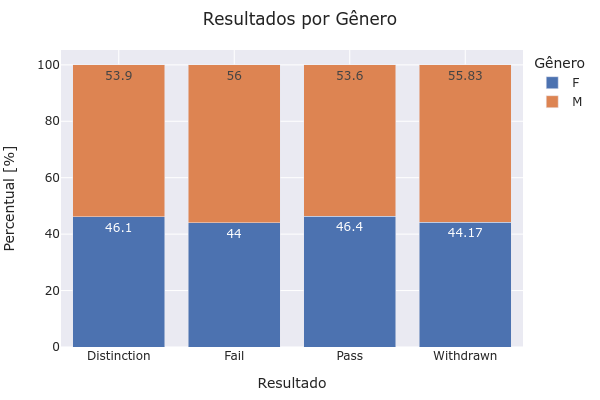

In [7]:
df = studentInfo.groupby(['gender', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"gender": "Genero", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Genero",
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Gênero',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Gênero",
    width=600, 
    height=400,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
fig.show("png")

## Correlação de person

# Resultado gênero

* Conforme gráfico e possível notar que a proporção de Masculino e feminino se mantêm em cada grupo do resultado final.

____
## Analisando a Região de moradia do estudante

* Quantidades

In [8]:
studentInfo['region'].unique()

array(['East Anglian Region', 'Scotland', 'North Western Region',
       'South East Region', 'West Midlands Region', 'Wales',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

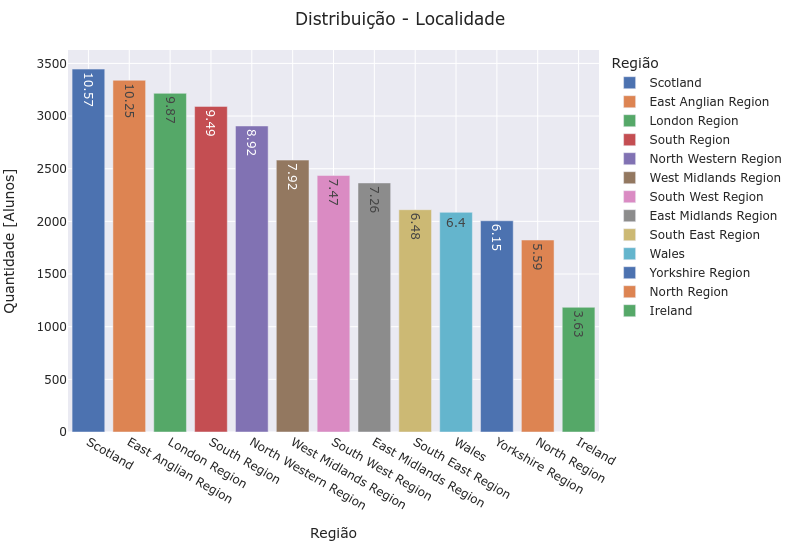

In [9]:
regiao = studentInfo.groupby('region').agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

regiao['Percentual'] = regiao.apply(lambda x: round(100 * (x['Qtde'] / regiao['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(regiao, x='Regiao', y='Qtde', text='Percentual', color ='Regiao',  template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Localidade',
    xaxis_title="Região",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Região",
    width=800, 
    height=550,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)

fig.show("png")

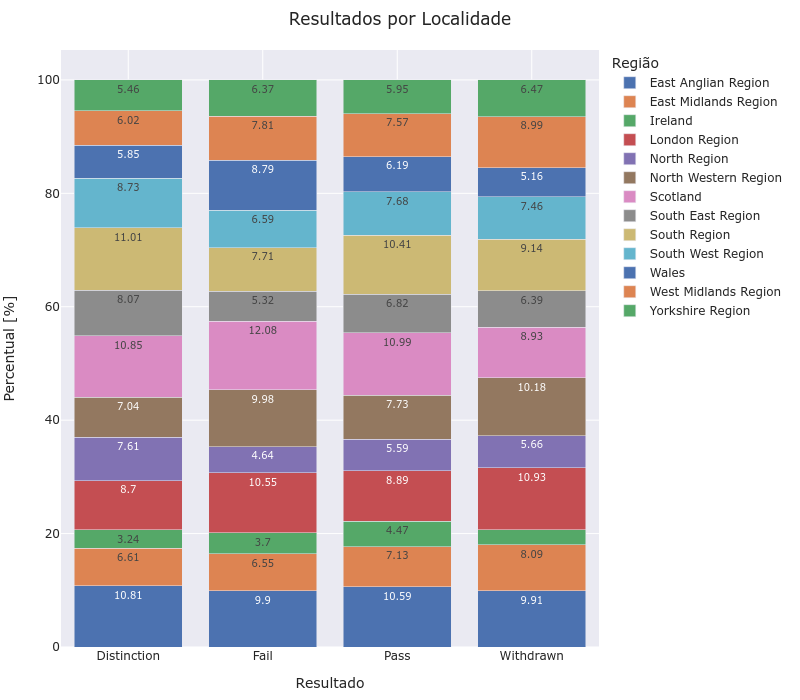

In [10]:
df = studentInfo.groupby(['region', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"region": "Regiao", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Regiao",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Localidade',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Região",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
## Analisando o nível de escolaridade

In [11]:
studentInfo['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

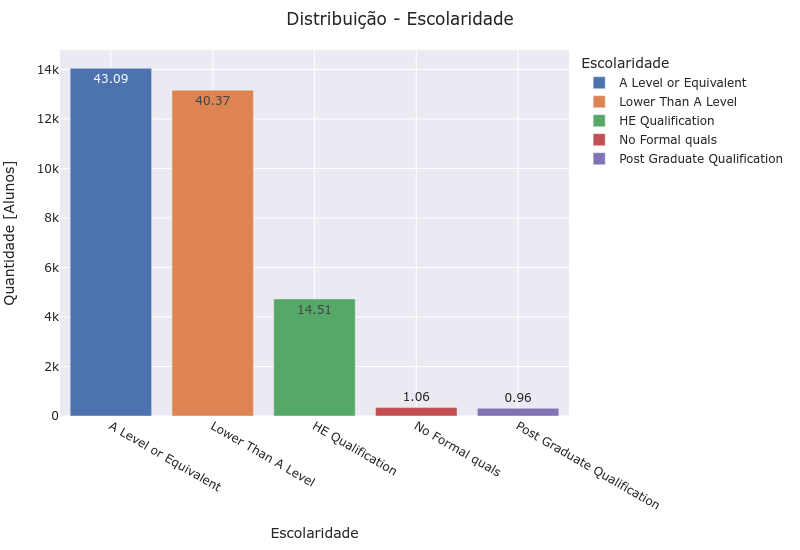

In [13]:
escolaridade = studentInfo.groupby('highest_education').agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", 'id_student': 'Qtde'}).sort_values(by='Qtde', ascending=False)

escolaridade['Percentual'] = escolaridade.apply(lambda x: round(100 * (x['Qtde'] / escolaridade['Qtde'].sum()), 2) ,axis=1)

fig = px.bar(escolaridade, x='Escolaridade', y='Qtde', text='Percentual', color='Escolaridade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

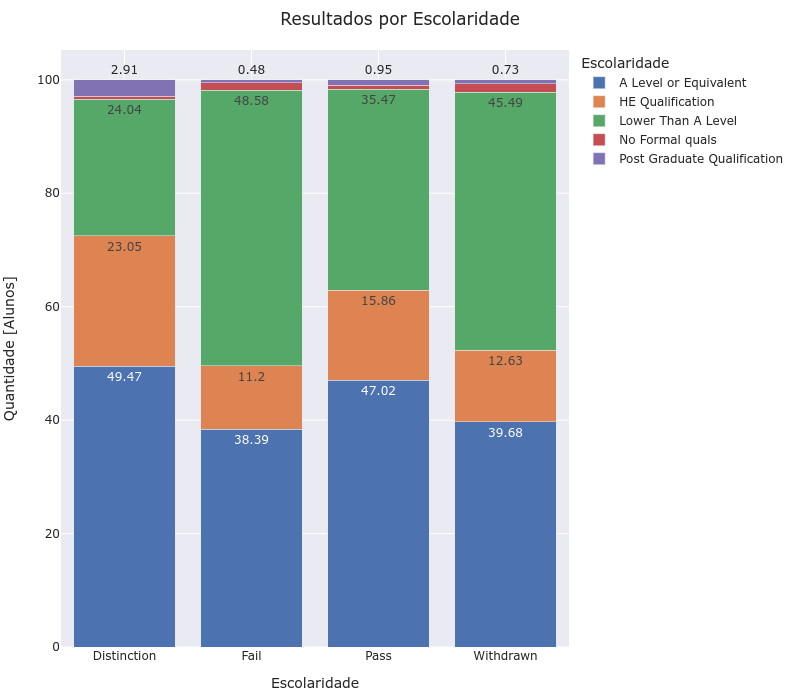

In [14]:
df = studentInfo.groupby(['highest_education', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"highest_education": "Escolaridade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Escolaridade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Escolaridade',
    xaxis_title="Escolaridade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Escolaridade",
    width=800, 
    height=700,
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
## Analisando o indice

In [15]:
studentInfo['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

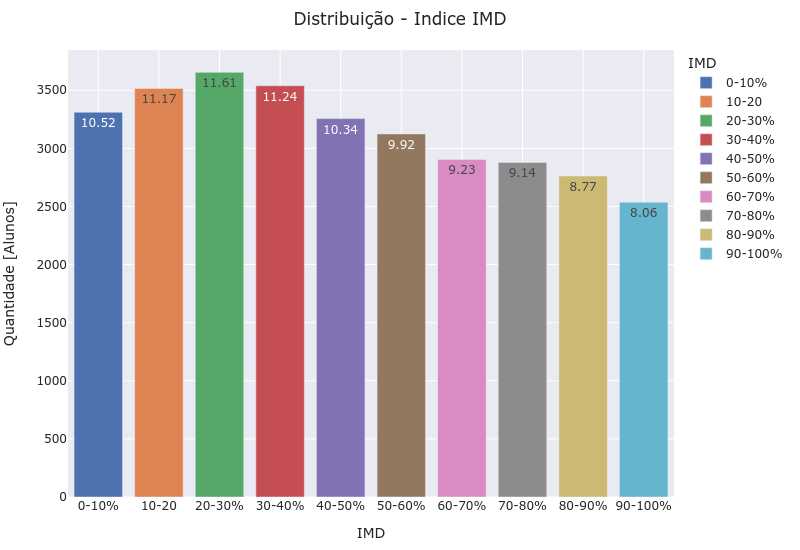

In [16]:
indice = studentInfo.groupby('imd_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", 'id_student': 'Qtde'}).sort_values(by='Indice', ascending=True)

indice['Percentual'] = indice.apply(lambda x:  round(100 * (x['Qtde'] / indice['Qtde'].sum()),2), axis=1)

fig = px.bar(indice, x='Indice', y='Qtde', text='Percentual', color='Indice', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Indice IMD',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show("png")

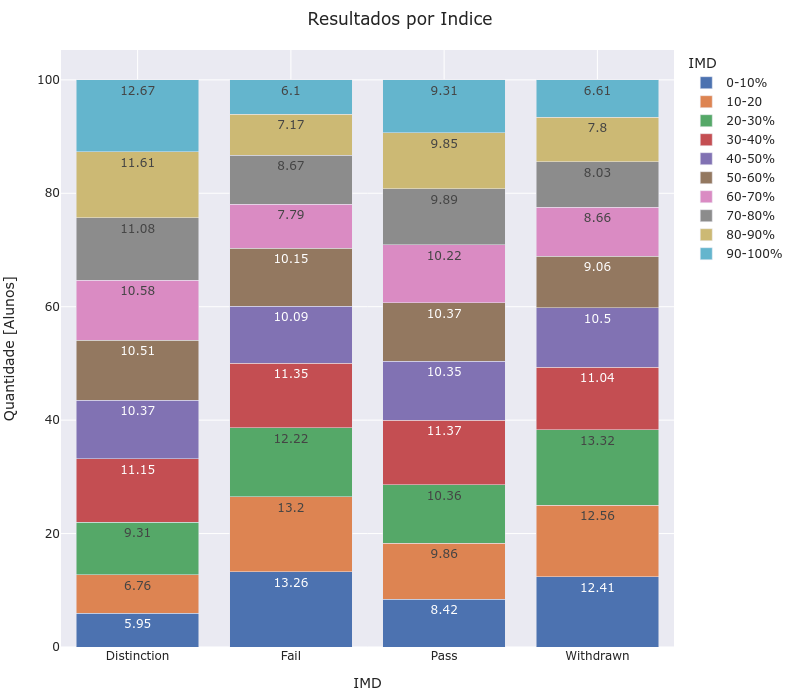

In [17]:
df = studentInfo.groupby(['imd_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"imd_band": "Indice", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text='Percentual', color="Indice",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Indice',
    xaxis_title="IMD",
    yaxis_title="Quantidade [Alunos]",
    legend_title="IMD",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
## Analisando a idade

In [18]:
studentInfo['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)

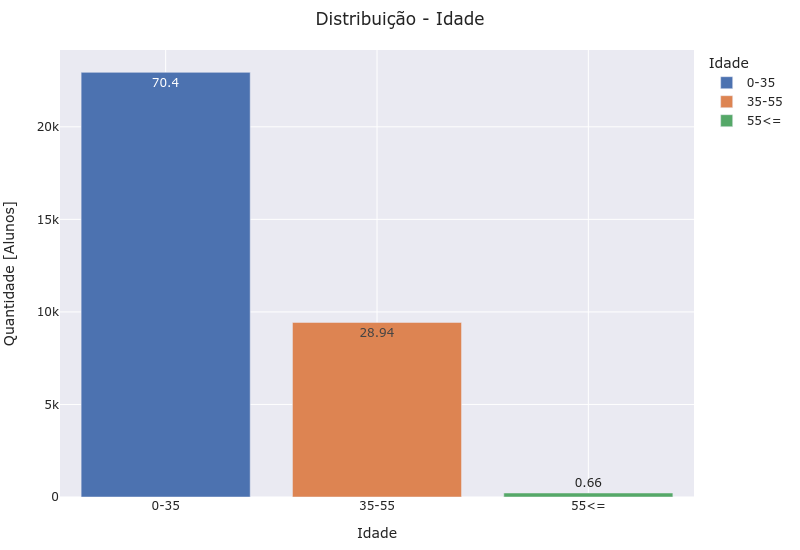

In [19]:
idade = studentInfo.groupby('age_band').agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", 'id_student': 'Qtde'}).sort_values(by='Idade', ascending=True)

idade['Percentual'] = idade.apply(lambda x:  round(100 * (x['Qtde'] / idade['Qtde'].sum()),2), axis=1)

fig = px.bar(idade, x='Idade', y='Qtde', text='Percentual', color='Idade', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Idade',
    xaxis_title="Idade",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Idade",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
    
)
fig.show("png")

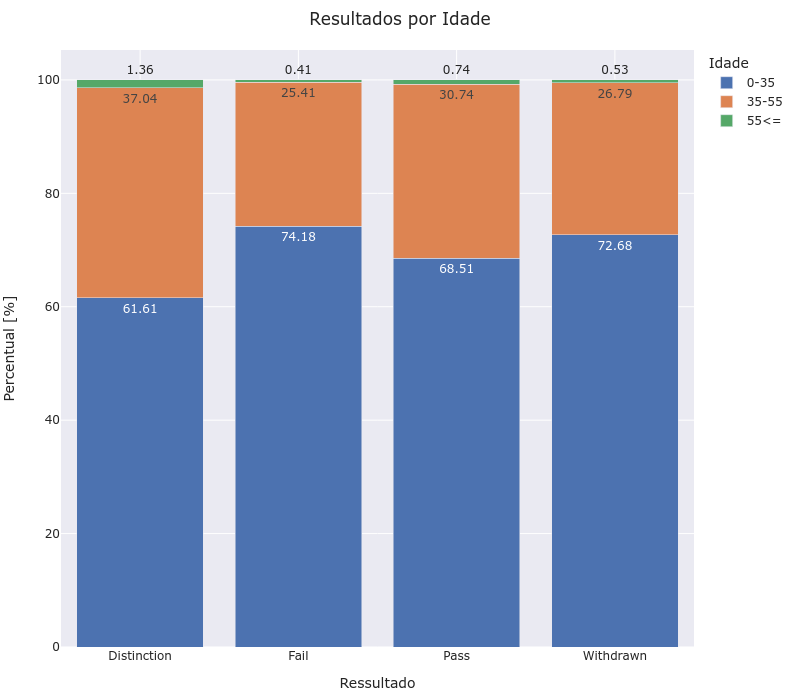

In [20]:
df = studentInfo.groupby(['age_band', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"age_band": "Idade", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Idade",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Idade',
    xaxis_title="Ressultado",
    yaxis_title="Percentual [%]",
    legend_title="Idade",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
## Analisando por tentativas

In [21]:
studentInfo['num_of_prev_attempts'].unique()

array([0, 1, 2, 4, 3, 5, 6])

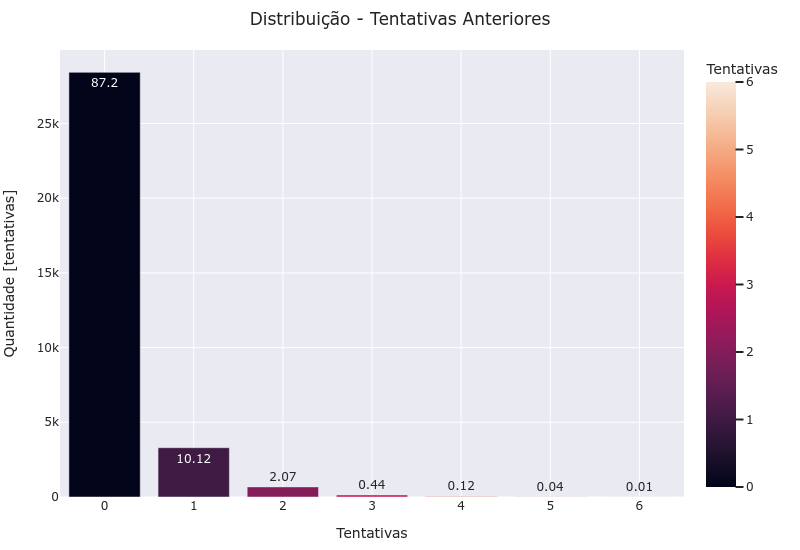

In [22]:
tentat = studentInfo.groupby('num_of_prev_attempts').agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", 'id_student': 'Qtde'}).sort_values(by='Tentativas', ascending=True)

tentat['Percentual'] = tentat.apply(lambda x:  round(100 * (x['Qtde'] / tentat['Qtde'].sum()),2), axis=1)

fig = px.bar(tentat, x='Tentativas', y='Qtde', text='Percentual', color='Tentativas', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Tentativas Anteriores',
    xaxis_title="Tentativas",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

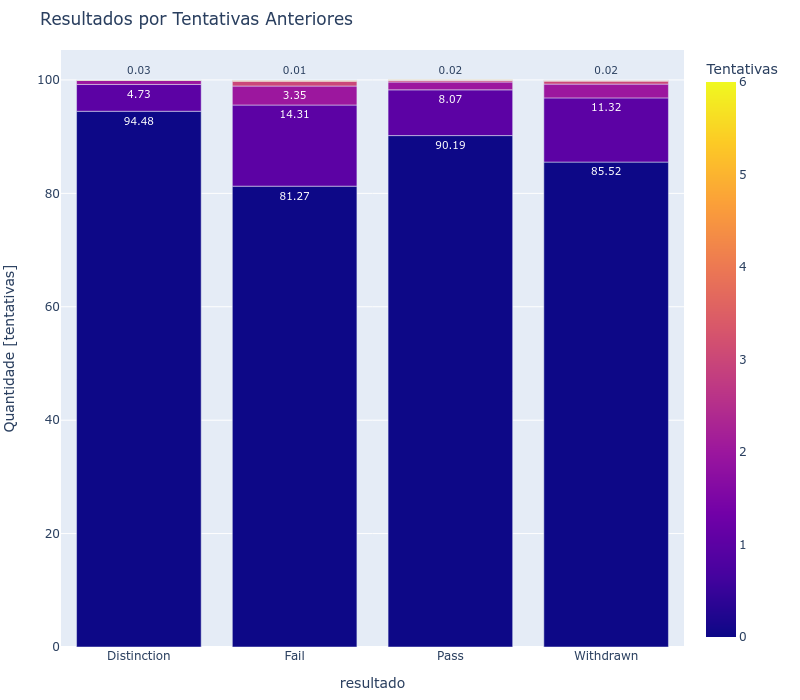

In [23]:
df = studentInfo.groupby(['num_of_prev_attempts', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"num_of_prev_attempts": "Tentativas", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

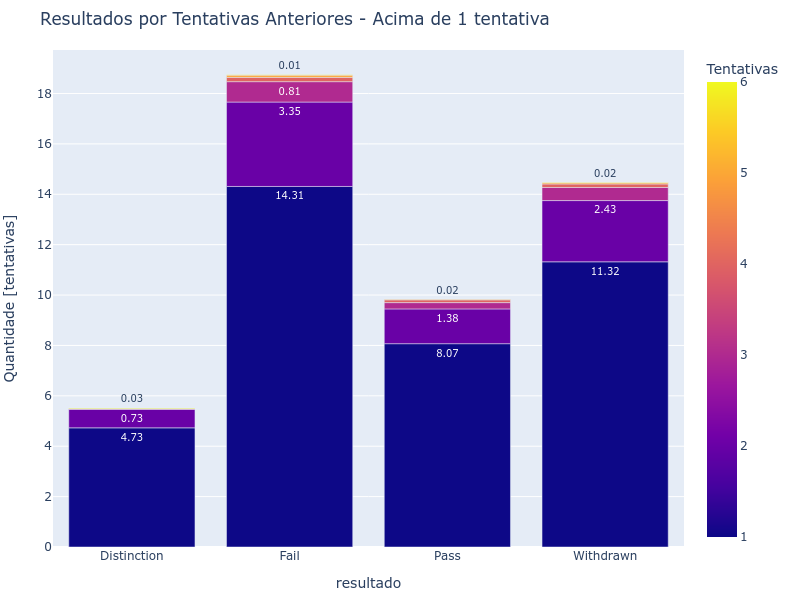

In [25]:
fig = px.bar(df[df['Tentativas'] != 0], x="Resultado", y="Percentual", text="Percentual", color="Tentativas",
            hover_data=['Percentual'], barmode = 'stack')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores - Acima de 1 tentativa',
    xaxis_title="resultado",
    yaxis_title="Quantidade [tentativas]",
    legend_title="Nº de tentativas anteriores",
    width=800, 
    height=600,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)

fig.show("png")

____
## Analisando por creditos

In [26]:
studentInfo['studied_credits'].unique().max()

655

In [27]:
studentInfo['studied_credits'].unique().min()

30

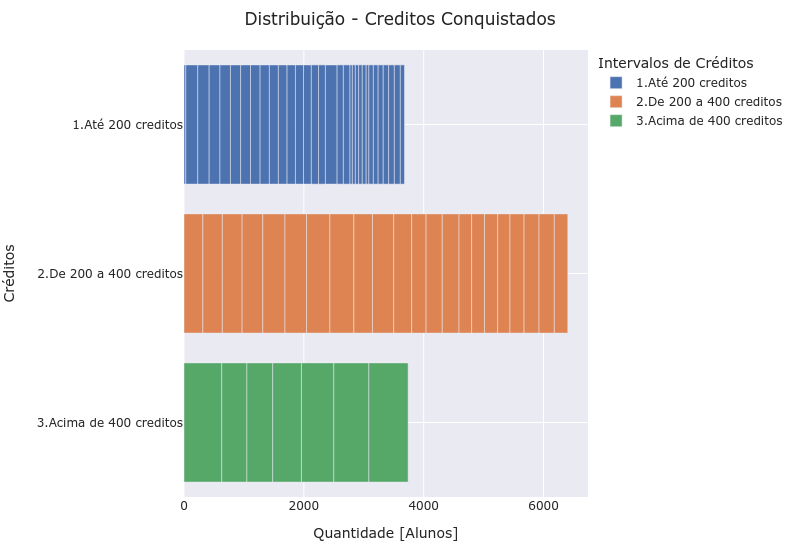

In [28]:
cred = studentInfo.groupby('studied_credits').agg({'id_student':'count'}).reset_index().\
    rename(columns={"studied_credits": "Creditos", 'id_student': 'Qtde'}).sort_values(by='Creditos', ascending=True)

cred['cred_bin'] = cred.apply(lambda x: '1.Até 200 creditos' if x['Creditos'] <= 200 else \
    ('2.De 200 a 400 creditos'if x['Creditos'] > 200 and x['Creditos'] <= 400 else '3.Acima de 400 creditos'), axis=1)

studentInfo['cred_bin'] = cred['cred_bin']

cred = cred.sort_values(by='cred_bin')

fig = px.bar(cred, x='Creditos', y='cred_bin', color='cred_bin', template="seaborn")
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Creditos Conquistados',
    xaxis_title="Quantidade [Alunos]",
    yaxis_title="Créditos",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=550,
    
)
fig.show("png")

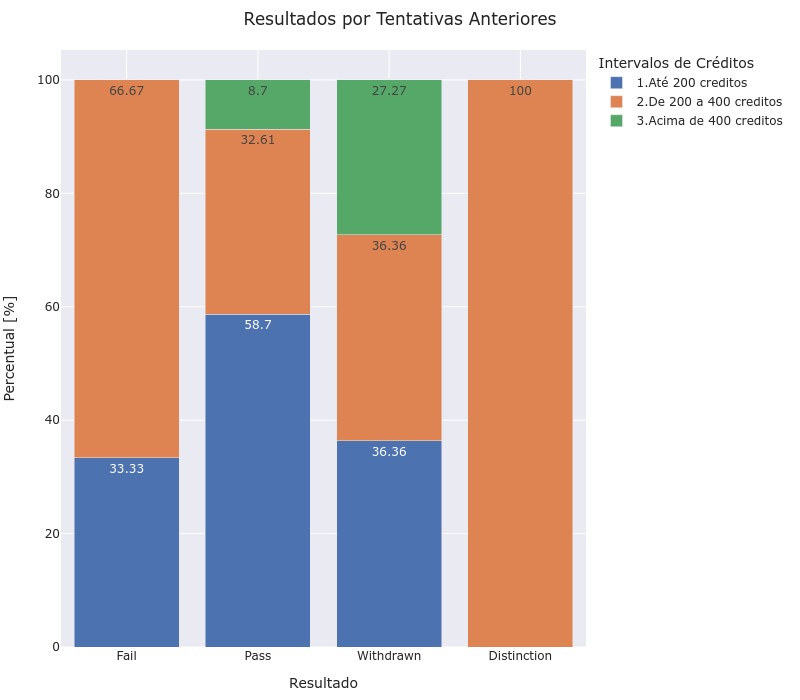

In [29]:
df = studentInfo.groupby(['cred_bin', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"cred_bin": "FaixasCredito", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", text="Percentual", color="FaixasCredito",
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Tentativas Anteriores',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Intervalos de Créditos",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

____
## Analisando por deficiêcia

In [30]:
studentInfo['disability'].unique()

array(['N', 'Y'], dtype=object)

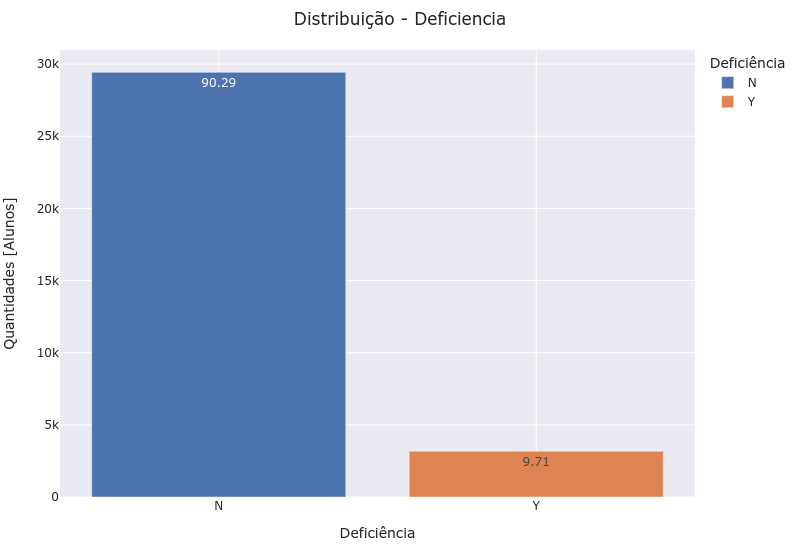

In [32]:
defci = studentInfo.groupby('disability').agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", 'id_student': 'Qtde'}).sort_values(by='Deficiencia', ascending=True)

defci['Percentual'] = defci.apply(lambda x:  round(100 * (x['Qtde'] / defci['Qtde'].sum()),2), axis=1)

fig = px.bar(defci, x='Deficiencia', y='Qtde', text='Percentual', template="seaborn", color='Deficiencia')
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Distribuição - Deficiencia',
    xaxis_title="Deficiência",
    yaxis_title="Quantidades [Alunos]",
    legend_title="Deficiência",
    width=800, 
    height=550,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
fig.show("png")

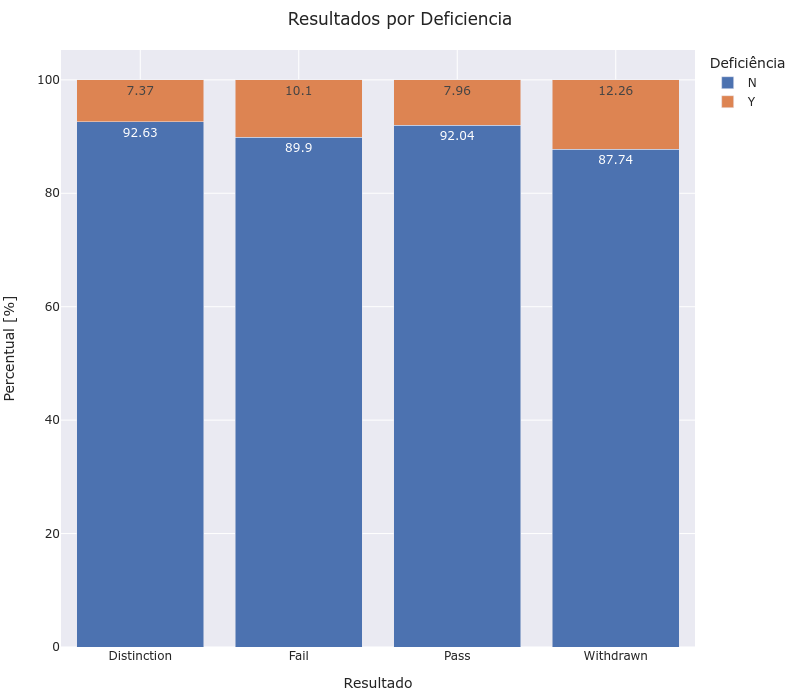

In [33]:
df = studentInfo.groupby(['disability', 'final_result']).agg({'id_student':'count'}).reset_index().\
    rename(columns={"disability": "Deficiencia", "final_result": 'Resultado','id_student': 'Qtde'})

df['Percentual'] = df.apply(lambda x:  round(100 * (x['Qtde'] / df[df['Resultado'] == x['Resultado']]['Qtde'].sum()),2), axis=1)

fig = px.bar(df, x="Resultado", y="Percentual", color="Deficiencia", text='Percentual',
            hover_data=['Percentual'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Resultados por Deficiencia',
    xaxis_title="Resultado",
    yaxis_title="Percentual [%]",
    legend_title="Deficiência",
    width=800, 
    height=700,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig.show("png")

In [34]:
studentInfo['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)